In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [4]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [5]:
predicted_graph1 = pc_chen(partial_corr_test, ts, 4, 0.05)
predicted_graph2 = pc_chen_modified(partial_corr_test, ts, 4, 0.05)

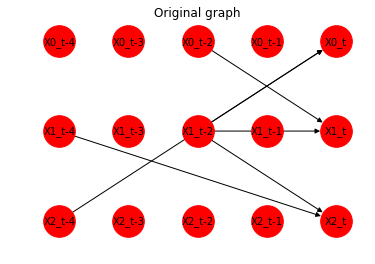

In [6]:
plt.title('Original graph')
generator.draw_graph()

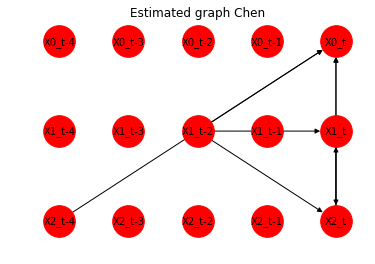

In [7]:
plt.title("Estimated graph Chen")
draw_graph(predicted_graph1, dimensions, max_p)

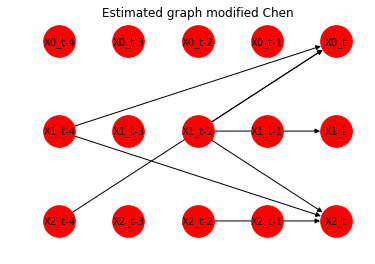

In [8]:
plt.title("Estimated graph modified Chen")
draw_graph(predicted_graph2, dimensions, max_p)

In [9]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph1), index=[0])

,FDR,FPR,TPR,accuracy,f1-score,matthews_corrcoef,precision
0,0.5,0.019608,0.666667,0.971429,0.571429,0.563137,0.5


In [10]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph2), index=[0])

,FDR,FPR,TPR,accuracy,f1-score,matthews_corrcoef,precision
0,0.285714,0.009804,0.833333,0.985714,0.769231,0.764316,0.714286


In [11]:
p_ranking, ic_scores = var_order_select(ts, max_p=10, drop=False)

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [12]:
pd.DataFrame(p_ranking)

,aic,bic,fpe,hqic
0,4,4,4,4
1,5,5,5,5
2,10,10,10,10
3,7,7,7,7
4,8,8,8,8
5,9,9,9,9
6,6,6,6,6
7,2,2,2,2
8,3,3,3,3
9,1,1,1,1


In [13]:
pd.DataFrame(ic_scores)

,aic,bic,fpe,hqic
0,-inf,-inf,0.000000e+00,-inf
1,-19.240433,-19.205794,4.398788e-09,-19.228708
2,-17.945891,-17.878777,1.607676e-08,-17.923172
3,-17.136849,-17.089220,3.607189e-08,-17.120726
4,-16.975231,-16.921107,4.241205e-08,-16.956910
5,-15.956862,-15.896243,1.174606e-07,-15.936342
6,-15.302191,-15.261056,2.258502e-07,-15.288266
7,-8.236158,-8.221004,2.642641e-04,-8.231028
8,-8.233824,-8.212175,2.649610e-04,-8.226496
9,1.480344,1.489004,4.382597e+00,1.483275
